# DATATHON FIAP

## CODE STARTUP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

In [13]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

### DF ANALYSIS

In [2]:
df

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase

In [3]:
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'NOME', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020', 'FASE_2021',
       'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022',
       'BOLSISTA_2022', 'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022',
       'PEDRA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022',
       'DESTAQUE_IPV_2022', 'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022',
       

Observa-se que temos colunas atribuidas por ano, vamos separar esse DF em 3 DFs por colunas referentes a cada ano, usando o "ALUNO" como chave

In [4]:
df_2020 = pd.concat([df[['NOME']], df.filter(regex='_2020')], axis=1)
df_2021 = pd.concat([df[['NOME']], df.filter(regex='_2021')], axis=1)
df_2022 = pd.concat([df[['NOME']], df.filter(regex='_2022')], axis=1)

In [5]:
print("DataFrame 2020")
print ("QTD Colunas 2020:",len(df_2020.columns))
df_2020

DataFrame 2020
QTD Colunas 2020: 19


,NOME,INSTITUICAO_ENSINO_ALUNO_2020,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,ALUNO-1,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-3,Escola Pública,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,ALUNO-4,Escola Pública,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,ALUNO-5,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,ALUNO-1347,Escola Pública,17,1,7B,Não,7.158543333333334,C,Ágata,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,9.16668,8.1,6.875,4.666666666666667,7.34375,6.333335,10
1347,ALUNO-1348,Escola Pública,13,2,3R,Sim,7.842224333333333,B,Ametista,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,7.1,6.875,6.333333333333333,8.541666666666666,9.11112,10


In [6]:
print("DataFrame 2021")
print ("QTD Colunas 2021:",len(df_2021.columns))
df_2021

DataFrame 2021
QTD Colunas 2021: 21


,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
1,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
3,ALUNO-4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,ALUNO-1345,0.0,L,Escola Pública,Ingressante,Ágata,6.606,9.0,6.7,7.5,4.9,7.2,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não avaliado,Não,7.1,5.0,Nível 1 (4o ano),-1.0
1345,ALUNO-1346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,ALUNO-1347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,ALUNO-1348,3.0,J,Rede Decisão,Veterano,Ametista,7.422,7.5,8.6,6.3,6.9,7.5,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Não avaliado,Não,8.5,5.0,Nível 4 (9o ano),-1.0


In [7]:
print("DataFrame 2022")
print ("QTD Colunas 2022:",len(df_2022.columns))
df_2022

DataFrame 2022
QTD Colunas 2022: 31


,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,ALUNO-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,ALUNO-1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,ALUNO-1346,0.0,U,2022.0,Não,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano)
1346,ALUNO-1347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,ALUNO-1348,4.0,P,2018.0,Sim,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM)


## EXPLORATORY ANALYSIS

### Analise de quantidade de alunos por ano

Agora vamos alimentar as quantidades com base em alguns filtros no dataframe original

In [8]:
df_2021_filtered = df[df['INSTITUICAO_ENSINO_ALUNO_2021'].notnull()]
df_2022_filtered = df[df['ANO_INGRESSO_2022'].notnull()]

alunos2020 = int(df['INSTITUICAO_ENSINO_ALUNO_2020'].notnull().sum())
alunos2021_ing = int(df_2021_filtered[df_2021_filtered['SINALIZADOR_INGRESSANTE_2021'] == 'Ingressante'].shape[0])
alunos2021_vet = int(df_2021_filtered[df_2021_filtered['SINALIZADOR_INGRESSANTE_2021'] == 'Veterano'].shape[0])
alunos2022_ing = int(df_2022_filtered[df_2022_filtered['ANO_INGRESSO_2022'] == 2022].shape[0])
alunos2022_vet = int(df_2022_filtered[df_2022_filtered['ANO_INGRESSO_2022'].notnull() & (df_2022_filtered['ANO_INGRESSO_2022'] != 2022)].shape[0])

In [9]:
qtdAlunos = {
    'ANO': [2020, 2021, 2021, 2022, 2022],
    'CLASSIFICAÇÃO': ['Ingressante', 'Ingressante', 'Veterano', 'Ingressante', 'Veterano'],
    'QUANTIDADE': [alunos2020, alunos2021_ing, alunos2021_vet, alunos2022_ing, alunos2022_vet]
}

# Criando o DataFrame
qtdAlunos = pd.DataFrame(qtdAlunos)

qtdAlunos

,ANO,CLASSIFICAÇÃO,QUANTIDADE
0,2020,Ingressante,728
1,2021,Ingressante,249
2,2021,Veterano,437
3,2022,Ingressante,398
4,2022,Veterano,464


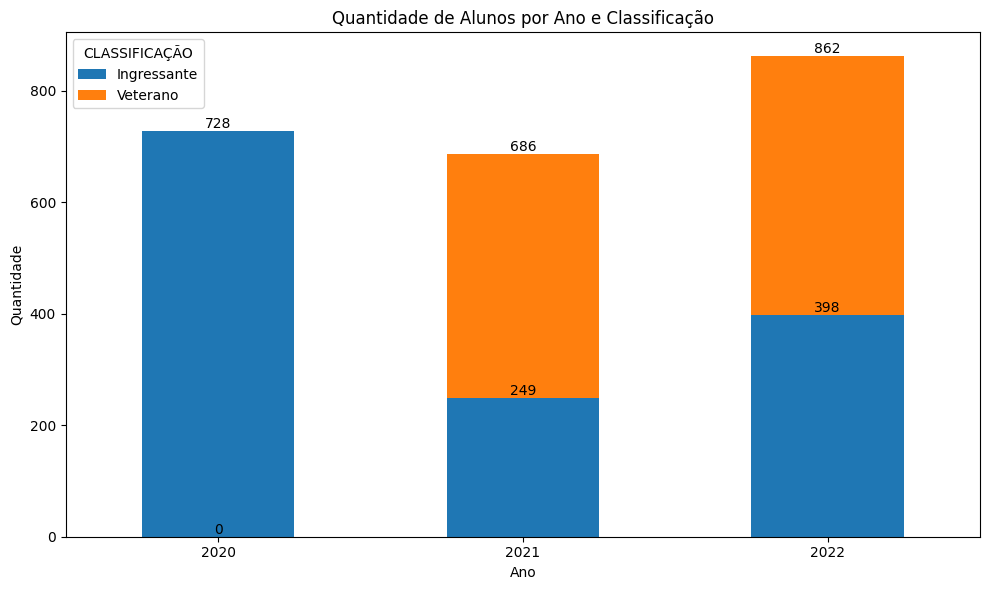

In [10]:
tabela_dinamica = qtdAlunos.pivot_table(index='ANO', columns='CLASSIFICAÇÃO', values='QUANTIDADE', fill_value=0)
ax = tabela_dinamica.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Quantidade de Alunos por Ano e Classificação')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## PREDICTIVE ANALYSIS

In [14]:
df_2020clean = cleaning_dataset(df_2020)
df_2021clean = cleaning_dataset(df_2021)
df_2022clean = cleaning_dataset(df_2022)

### Q1 - Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


#### DATA MODELING

In [25]:
display(df_2020clean.columns)

display(df_2021clean.columns)

display(df_2022clean.columns)

Index(['NOME', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020',
       'ANOS_PM_2020', 'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

Index(['NOME', 'FASE_2021', 'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021'],
      dtype='object')

Index(['NOME', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

Vamos montar 2 dataframes, um com as colunas INDE E PEDRA, e outro com todos os componentes do INDE. Realizaremos a analise com os 2 compararemos os resultados

In [36]:
data2020 = df_2020clean[['INDE_2020','PEDRA_2020']]
data2021 = df_2021clean[['INDE_2021','PEDRA_2021']]
data2022 = df_2022clean[['INDE_2022','PEDRA_2022']]

data2020.rename(columns={'INDE_2020': 'INDE', 'PEDRA_2020': 'PEDRA'}, inplace=True)
data2021.rename(columns={'INDE_2021': 'INDE', 'PEDRA_2021': 'PEDRA'}, inplace=True)
data2022.rename(columns={'INDE_2022': 'INDE', 'PEDRA_2022': 'PEDRA'}, inplace=True)


C:\Users\lamanv\AppData\Local\Temp\4\ipykernel_13640\2433360150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2020.rename(columns={'INDE_2020': 'INDE', 'PEDRA_2020': 'PEDRA'}, inplace=True)
C:\Users\lamanv\AppData\Local\Temp\4\ipykernel_13640\2433360150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2021.rename(columns={'INDE_2021': 'INDE', 'PEDRA_2021': 'PEDRA'}, inplace=True)
C:\Users\lamanv\AppData\Local\Temp\4\ipykernel_13640\2433360150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [72]:
data = pd.concat([data2020, data2021, data2022], ignore_index=True)
data['INDE'] = pd.to_numeric(data['INDE'], errors='coerce')
data['INDE'] = data['INDE'].round(2)
data.reset_index
data


,INDE,PEDRA
0,7.88,Ametista
1,7.86,Ametista
2,5.08,Quartzo
3,8.08,Ametista
4,8.38,Ametista
...,...,...
2271,8.15,Topázio
2272,5.67,Quartzo
2273,8.14,Topázio
2274,6.75,Ágata


In [73]:
nan_rows = data[data.isna().any(axis=1)]
print(nan_rows)

     INDE     PEDRA
680   NaN  D9891/2A
760   NaN    #NULO!
973   NaN    #NULO!


In [74]:
data = data.dropna()
data


,INDE,PEDRA
0,7.88,Ametista
1,7.86,Ametista
2,5.08,Quartzo
3,8.08,Ametista
4,8.38,Ametista
...,...,...
2271,8.15,Topázio
2272,5.67,Quartzo
2273,8.14,Topázio
2274,6.75,Ágata


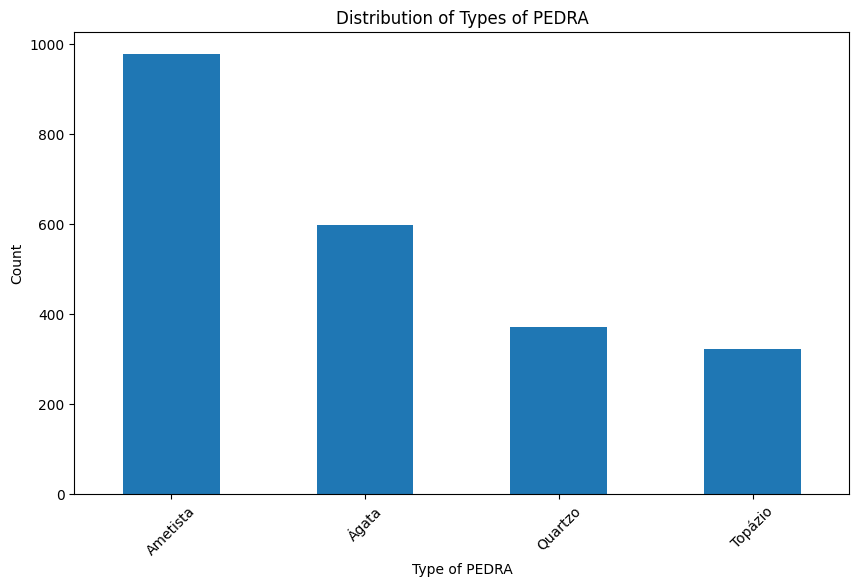

In [76]:
pedra_counts = data['PEDRA'].value_counts()

plt.figure(figsize=(10, 6))
pedra_counts.plot(kind='bar')
plt.title('Distribution of Types of PEDRA')
plt.xlabel('Type of PEDRA')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### DATA PREDICTION

In [81]:

X = data[['INDE']]
y = data['PEDRA']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

# Print accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

    Ametista       0.86      0.86      0.86       192
     Quartzo       0.87      0.89      0.88        74
     Topázio       0.76      0.85      0.80        67
       Ágata       0.86      0.78      0.82       122

    accuracy                           0.84       455
   macro avg       0.84      0.85      0.84       455
weighted avg       0.85      0.84      0.84       455

Confusion Matrix:
[[166   0  18   8]
 [  0  66   0   8]
 [ 10   0  57   0]
 [ 17  10   0  95]]
Accuracy Score:
0.843956043956044
